In [1]:
import numpy as np
import pandas as pd
import os
from matplotlib import pyplot as plt
from time import gmtime, strftime

In [2]:
my_path = str(os.getcwd())
X_train = np.load(my_path+'/.data/X_train_surge_new.npz')
Y_train = pd.read_csv(my_path+'/.data/Y_train_surge.csv')
X_test = np.load(my_path+'/.data/X_test_surge_new.npz')


['id_sequence', 't_slp', 'slp', 't_surge1_input', 'surge1_input', 't_surge2_input', 'surge2_input', 't_surge1_output', 't_surge2_output']
(5599, 40, 41, 41)
(40, 41, 41)


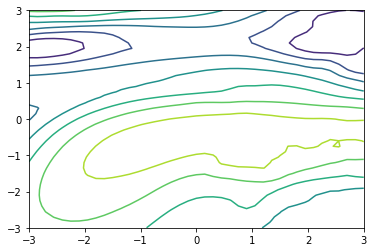

In [3]:
print(X_train.files)
#print(Y_train)
slp = X_train['slp']
slp0 = slp[0]
print(np.shape(slp))
print(np.shape(slp0))
pf0 = slp0[2]

xlist = np.linspace(-3.0, 3.0, 41)
ylist = np.linspace(-3.0, 3.0, 41)
X, Y = np.meshgrid(xlist, ylist)
Z = pf0
fig,ax=plt.subplots(1,1)
cp = ax.contour(X, Y, Z)

(509, 40)


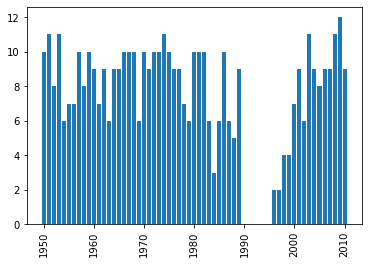

In [4]:
#times
t_slp = X_test['t_slp']
print(np.shape(t_slp))
times = [gmtime(int(x[0])) for x in t_slp]
d = {}
for t in times:
    #print(t)
    #print(t.tm_year)
    y = t.tm_year
    if y in d:
        d[y]+=1
    else:
        d[y]=0
    #print(strftime("%a, %d %b %Y %H:%M:%S",t))
#print(d.items())
names = list(d.keys())
values = list(d.values())

plt.bar(names, values)
plt.xticks(rotation = 90)
plt.show()

In [5]:
t_surge1_input = X_train['t_surge1_input']
t_surge2_input = X_train['t_surge2_input']
t_surge1_output = X_train['t_surge1_output']
t_surge2_output = X_train['t_surge2_output']
t_slp = X_train['t_slp']
print(np.shape(t_surge2_output))

diff = []
for (l1,l2) in [(t_surge1_input,t_surge1_output),(t_surge2_input,t_surge2_output)]:
    for i in range(5599):
        #diff.append(0)
        for j in range(10):
            diff.append((l1[i][j]-t_slp[i][0])/3600)
        for j in range(10):
            diff.append((l2[i][j]-t_slp[i][0])/3600)
        

(5599, 10)


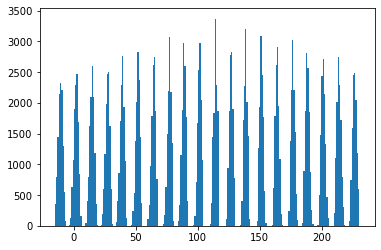

In [6]:
plt.hist(diff,bins=240)
plt.show()

In [9]:
print(X_train.files)

['id_sequence', 't_slp', 'slp', 't_surge1_input', 'surge1_input', 't_surge2_input', 'surge2_input', 't_surge1_output', 't_surge2_output']


(5599, 10)


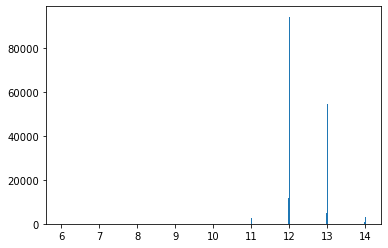

In [8]:
inter = []
print(t_surge1_input.shape)
for (l1,l2) in [(t_surge1_input,t_surge1_output),(t_surge2_input,t_surge2_output)]:
    for i in range(5599):
        l = np.concatenate((l1[i], l2[i]))
        inter += [float(l[i]-l[i-1])/3600 for i in range(1,20)]

plt.hist(inter,500)
plt.show()

Visualisation des données pour une expérience en particulier

(-10.0, 250.0)

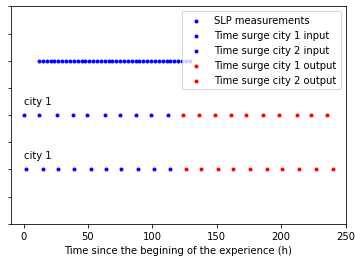

In [54]:
i = 3468
time_start = X_train['t_surge1_input'][i][0]/3600
times_slp = X_train['t_slp'][i]/3600 -time_start
times_surge1_input = X_train['t_surge1_input'][i]/3600-time_start
times_surge2_input = X_train['t_surge2_input'][i]/3600-time_start
times_surge1_output = X_train['t_surge1_output'][i]/3600-time_start
times_surge2_output = X_train['t_surge2_output'][i]/3600-time_start
plt.scatter(times_slp,[1.5 for _ in range(len(times_slp))],color='blue',marker='.',label='Data')
plt.scatter(times_surge1_input,[1 for _ in range(len(times_surge1_input))],color='blue',marker='.')
plt.scatter(times_surge2_input,[0.5 for _ in range(len(times_surge2_input))],color='blue',marker='.')
plt.scatter(times_surge1_output,[1 for _ in range(len(times_surge1_output))],color='red',marker='.',label='Time surge city 1 output')
plt.scatter(times_surge2_output,[0.5 for _ in range(len(times_surge2_output))],color='red',marker='.',label='Time surge city 2 output')
ax = plt.gca()
ax.axes.yaxis.set_ticklabels([])
plt.xlabel("Time since the begining of the experience (h)")
plt.legend()
plt.text(0,1.1,"city 1")
plt.text(0,0.6,"city 1")
plt.ylim([0,2])
plt.xlim([-10,250])